# Example of model comparison for classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\frase\AppData\Local\Temp\ipykernel_6724\2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# read in the training and test data
synthtr = pd.read_csv("synthtr.csv", header=0, names=None)
synthte = pd.read_csv("synthte.csv", header=0, names=None)
synthtr.head()

,xs,ys,yc
0,0.051008,0.160862,0
1,-0.748074,0.089040,0
2,-0.772934,0.263172,0
3,0.218374,0.127061,0
4,0.372683,0.496562,0


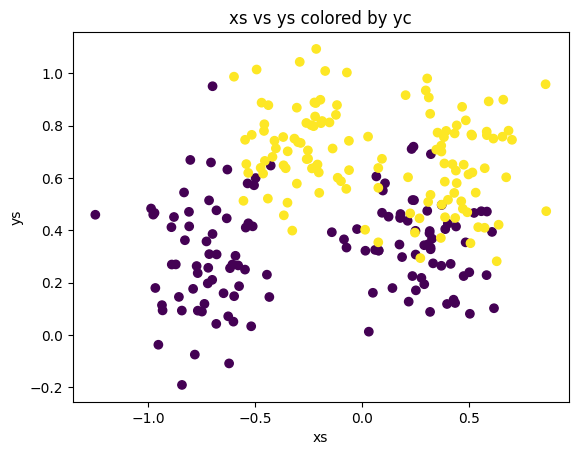

In [3]:
# Plot of the training data

import matplotlib.pyplot as plt

plt.scatter(synthtr['xs'], synthtr['ys'], c=synthtr['yc'])
plt.xlabel('xs')
plt.ylabel('ys')
plt.title('xs vs ys colored by yc')
plt.show()

In [4]:
# Before training the models with convert dataframes to numpy arrays
Xtrain = synthtr[['xs', 'ys']].to_numpy()
ytrain = synthtr[['yc']].to_numpy()
print(Xtrain.shape)
print(ytrain.shape)

Xtest = synthte[['xs', 'ys']].to_numpy()
ytest = synthte[['yc']].to_numpy()

(250, 2)
(250, 1)


# Logistic regression

In [10]:
# Train a logistic regression model on the training data
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic = LogisticRegression()


# Train the model on the training data
# Here we need to flatten the labels array before passing to the Logistic regression model (using the ravel function)
synth_logistic = logistic.fit(Xtrain, ytrain.ravel())


# Model prediction on the test  set -- these are the hard prediction (with a threshold of 0.5)
synth_logistic_test = synth_logistic.predict(Xtest)

# We can then see how many errors are made on the training and test sets    
print("Test error for logistic regression:", np.mean(synth_logistic_test != ytest.ravel()))

Test error for logistic regression: 0.111


(14400,)


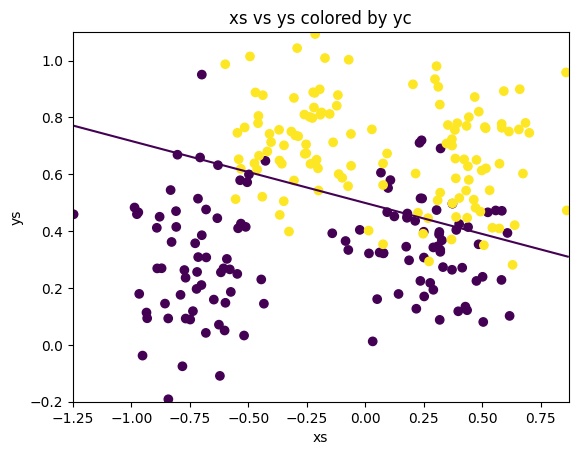

In [18]:
# make a grid to plot the decision boundary
m = 120
x = np.linspace(-1.25, 0.87, m)
y = np.linspace(-0.2, 1.1, m)
xv, yv = np.meshgrid(x, y)

# reshape xv and yv to 1D arrays and stack them to create a 2D array
gr = np.column_stack((xv.ravel(), yv.ravel()))
gr.shape

# Predict the model on the grid, taking prob of one class
my_gr_pred = synth_logistic.predict_proba(gr)[:, 1]
print(my_gr_pred.shape)

# reshape the predictions to a 2D array
my_gr_pred_mat = my_gr_pred.reshape(m, m)

# plot the contour at level 0.5 as well as the data
plt.scatter(synthtr['xs'], synthtr['ys'], c=synthtr['yc'])
plt.xlabel('xs')
plt.ylabel('ys')
plt.title('xs vs ys colored by yc')
plt.contour(xv, yv, my_gr_pred_mat, levels=[0.5])
plt.show()

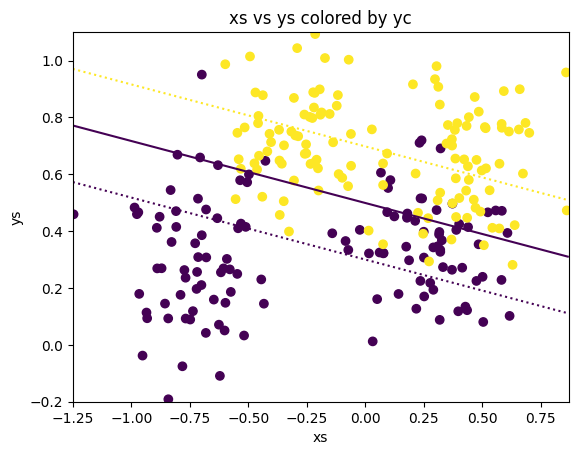

In [19]:
# plot the contour at level 0.5, 0.25, 0.75 as well as the data
plt.scatter(synthtr['xs'], synthtr['ys'], c=synthtr['yc'])
plt.xlabel('xs')
plt.ylabel('ys')
plt.title('xs vs ys colored by yc')
plt.contour(xv, yv, my_gr_pred_mat, levels=[0.5])
plt.contour(xv, yv, my_gr_pred_mat, levels=[0.25, 0.75], linestyles='dotted')

Test error for logistic regression with polynomial features : 0.101


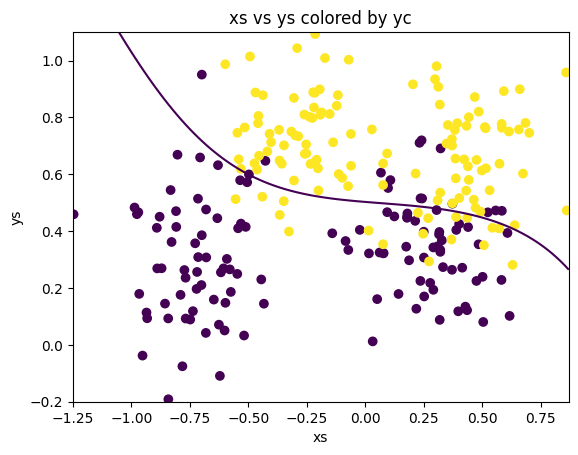

In [32]:
# We can also consider a logistic regression on an expanded basis
# Here we consuder Polynomials of degree M=5 for xs and ys

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

M = 5

# Create a pipeline that first creates polynomial features and then fits a logistic regression model
polyLogistic = make_pipeline(PolynomialFeatures(M), LogisticRegression())
synth_polyLogistic = polyLogistic.fit(Xtrain, ytrain.ravel())

# Model prediction on the test set 
synth_polyLogistic_test = synth_polyLogistic.predict(Xtest)

# We can then see how many errors are made on the training and test sets    
print("Test error for logistic regression with polynomial features :", np.mean(synth_polyLogistic_test != ytest.ravel()))

# We plot the decision boundary
# Predict the model on the grid
my_gr_pred2 = synth_polyLogistic.predict_proba(gr)[:, 1]

# reshape the predictions to a 2D array
my_gr_pred_mat2 = my_gr_pred2.reshape(m, m)

# plot the contour at level 0.5 as well as the data
plt.scatter(synthtr['xs'], synthtr['ys'], c=synthtr['yc'])
plt.xlabel('xs')
plt.ylabel('ys')
plt.title('xs vs ys colored by yc')
plt.contour(xv, yv, my_gr_pred_mat2, levels=[0.5])
plt.show()

See how changing the degree of the polynome change the error rate and the decision boundary.

# LDA and QDA

Test error for LDA : 0.108


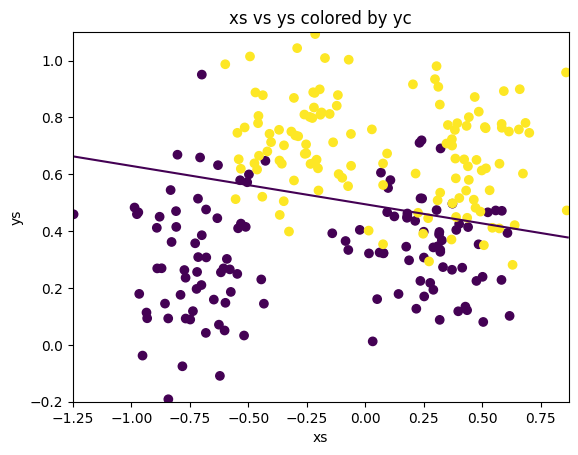

In [33]:
# We can now train a LDA classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
synth_lda = lda.fit(X=Xtrain, y=ytrain.ravel())

# Model prediction on the test set 
synth_lda_test = synth_lda.predict(Xtest)

# We can then see how many errors are made on the training and test sets    
print("Test error for LDA :", np.mean(synth_lda_test != ytest.ravel()))

# We plot the decision boundary
# Predict the model on the grid
my_gr_pred_lda = synth_lda.predict_proba(gr)[:, 1]

# reshape the predictions to a 2D array
my_gr_pred_mat_lda = my_gr_pred_lda.reshape(m, m)

# plot the contour at level 0.5 as well as the data
plt.scatter(synthtr['xs'], synthtr['ys'], c=synthtr['yc'])
plt.xlabel('xs')
plt.ylabel('ys')
plt.title('xs vs ys colored by yc')
plt.contour(xv, yv, my_gr_pred_mat_lda, levels=[0.5])
plt.show()

Test error for QDA : 0.102


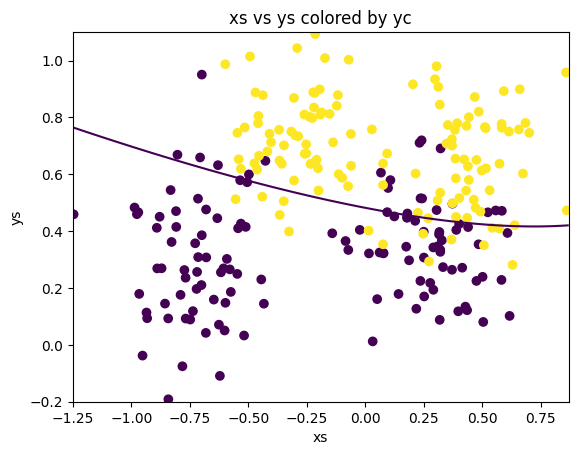

In [34]:
# We can now train a QDA classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

lda = QuadraticDiscriminantAnalysis()
synth_qda = lda.fit(X=Xtrain, y=ytrain.ravel())

# Model prediction on the test set 
synth_qda_test = synth_qda.predict(Xtest)

# We can then see how many errors are made on the training and test sets    
print("Test error for QDA :", np.mean(synth_qda_test != ytest.ravel()))

# We plot the decision boundary
# Predict the model on the grid
my_gr_pred_qda = synth_qda.predict_proba(gr)[:, 1]

# reshape the predictions to a 2D array
my_gr_pred_mat_qda = my_gr_pred_qda.reshape(m, m)

# plot the contour at level 0.5 as well as the data
plt.scatter(synthtr['xs'], synthtr['ys'], c=synthtr['yc'])
plt.xlabel('xs')
plt.ylabel('ys')
plt.title('xs vs ys colored by yc')
plt.contour(xv, yv, my_gr_pred_mat_qda, levels=[0.5])
plt.show()

# K-nearest neighbours

Test error for knn classifier : 0.13


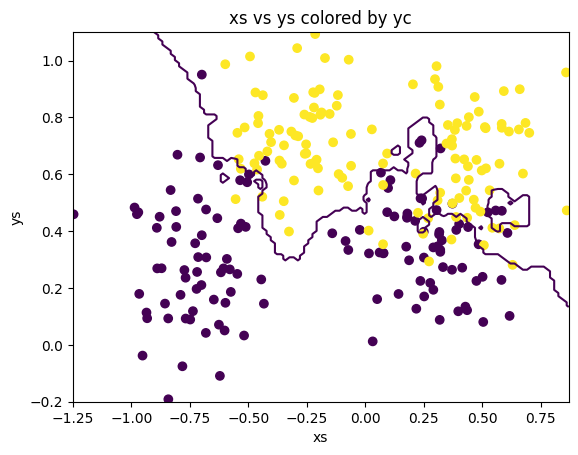

In [49]:
# Let now use a k-nearest neighbors classifier

from sklearn.neighbors import KNeighborsClassifier

# Let's assume that we want to use 5 nearest neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain, ytrain.ravel())

# Now the k-NN model is trained and you can use it to make predictions
knn_test = knn.predict(Xtest)
print("Test error for knn classifier :", np.mean(knn_test != ytest.ravel()))

# We plot the decision boundary
# Predict the model on the grid
my_gr_pred_knn = knn.predict_proba(gr)[:, 1]

# reshape the predictions to a 2D array
my_gr_pred_mat_knn = my_gr_pred_knn.reshape(m, m)

# plot the contour at level 0.5 as well as the data
plt.scatter(synthtr['xs'], synthtr['ys'], c=synthtr['yc'])
plt.xlabel('xs')
plt.ylabel('ys')
plt.title('xs vs ys colored by yc')
plt.contour(xv, yv, my_gr_pred_mat_knn, levels=[0.5])
plt.show()

# Model comparison using the ROC curves and AUCs

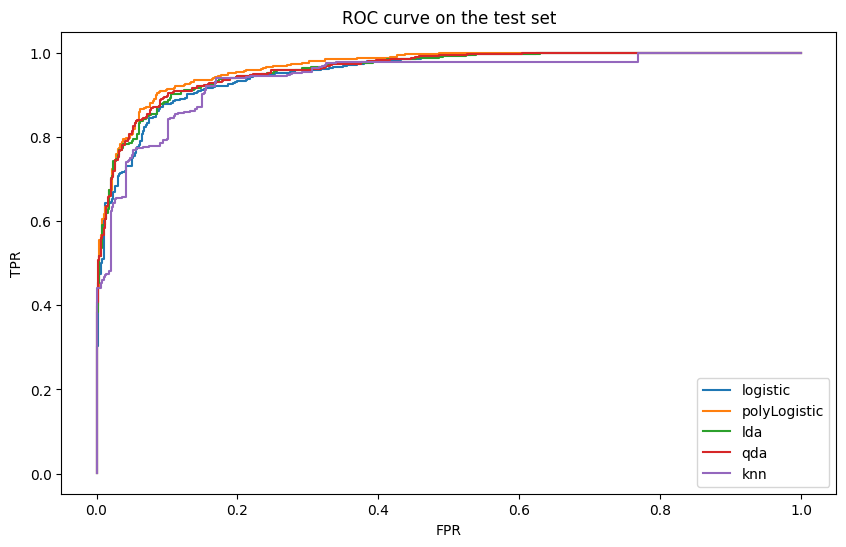

In [50]:
# We create a function to plot the ROC curve
def roc_curve(labels, scores):
    
    idx = np.argsort(scores)[::-1]
    labels = labels[idx]
    
    res = pd.DataFrame()
    
    res["TPR"] = np.cumsum(labels) / np.sum(labels)
    res["FPR"] = np.cumsum(1 - labels) / np.sum(1 - labels)
    
    return res

# We first need to extract the probability of class 1 for each model
# and then apply the roc_curve function to these probabilities
synth_logistic_test_prob = synth_logistic.predict_proba(Xtest)
logistic_roc = roc_curve(ytest, synth_logistic_test_prob[:, -1])

synth_polyLogistic_test_prob = synth_polyLogistic.predict_proba(Xtest)
polyLogistic_roc = roc_curve(ytest, synth_polyLogistic_test_prob[:, -1])

synth_lda_test_prob = synth_lda.predict_proba(Xtest)
lda_roc = roc_curve(ytest, synth_lda_test_prob[:, -1])

synth_qda_test_prob = synth_qda.predict_proba(Xtest)
qda_roc = roc_curve(ytest, synth_qda_test_prob[:, -1])

synth_knn_test_prob = knn.predict_proba(Xtest)
knn_roc = roc_curve(ytest, synth_knn_test_prob[:, -1])


plt.figure(figsize=(10, 6))
plt.plot(logistic_roc["FPR"], logistic_roc["TPR"], label="logistic")
plt.plot(polyLogistic_roc["FPR"], polyLogistic_roc["TPR"], label="polyLogistic")
plt.plot(lda_roc["FPR"], lda_roc["TPR"], label="lda")
plt.plot(qda_roc["FPR"], qda_roc["TPR"], label="qda")
plt.plot(knn_roc["FPR"], knn_roc["TPR"], label="knn")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve on the test set")
plt.legend()
plt.show()

In [52]:
# We compute the AUC by integrating the ROC curve using the composite trapezoidal rule
logistic_auc = np.trapz(y=logistic_roc["TPR"], x=logistic_roc["FPR"])
polyLogistic_auc = np.trapz(y=polyLogistic_roc["TPR"], x=polyLogistic_roc["FPR"])
lda_auc = np.trapz(y=lda_roc["TPR"], x=lda_roc["FPR"])
qda_auc = np.trapz(y=qda_roc["TPR"], x=qda_roc["FPR"])
knn_auc = np.trapz(y=knn_roc["TPR"], x=knn_roc["FPR"])

print("AUC for logistic regression :", logistic_auc)
print("AUC for logistic regression with polynomial features :", polyLogistic_auc)
print("AUC for LDA :", lda_auc)
print("AUC for QDA :", qda_auc)
print("AUC for k-NN :", knn_auc)

AUC for logistic regression : 0.9539439999999999
AUC for logistic regression with polynomial features : 0.966304
AUC for LDA : 0.959044
AUC for QDA : 0.960272
AUC for k-NN : 0.9415160000000001
